### 1119007 - Timothy Ray
### 1119023 - Jedediah Fanuel
### 1119033 - Fedly Septian

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

In [144]:
vehicles_df = pd.read_csv("Amtrak Passenger Rail Fuel Consumption and Travel.csv")
print(vehicles_df.shape)

(33, 8)


In [145]:
vehicles_df.head(10)

,Year,Number_Of_Locomotives_In_Use,Number_Of_Cars_In_Use,Million_Miles_Traveled_By_Train,Million_Miles_Traveled_By_Car,Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours,Diesel_Energy_Consumption_By_Train_In_Million_Gallons,Average_Miles_Traveled_Per_Car_In_Thousands
0,1975,355,1913,30,253,180,63,132
1,1980,419,2128,30,235,254,64,110
2,1985,291,1854,30,251,295,65,135
3,1990,318,1863,33,301,330,82,162
4,1991,316,1786,34,313,303,82,175
5,1992,336,1796,34,307,300,82,171
6,1993,360,1853,35,303,301,83,164
7,1994,338,1852,34,304,309,74,164
8,1995,313,1722,32,292,336,72,170
9,1996,299,1730,30,276,363,71,160


In [146]:
print(vehicles_df.columns.values)

['Year' 'Number_Of_Locomotives_In_Use' 'Number_Of_Cars_In_Use'
 'Million_Miles_Traveled_By_Train' 'Million_Miles_Traveled_By_Car'
 'Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours'
 'Diesel_Energy_Consumption_By_Train_In_Million_Gallons'
 'Average_Miles_Traveled_Per_Car_In_Thousands']


## Missing Value

In [147]:
print("null values: \n")
print(vehicles_df.isna())

null values: 

     Year  Number_Of_Locomotives_In_Use  Number_Of_Cars_In_Use  \
0   False                         False                  False   
1   False                         False                  False   
2   False                         False                  False   
3   False                         False                  False   
4   False                         False                  False   
5   False                         False                  False   
6   False                         False                  False   
7   False                         False                  False   
8   False                         False                  False   
9   False                         False                  False   
10  False                         False                  False   
11  False                         False                  False   
12  False                         False                  False   
13  False                         False                  Fals

In [148]:
print("total null values: ", vehicles_df.isna().sum().sum())

total null values:  0


#### No missing data

## Duplicate Data

In [149]:
duplicate_rows_df = vehicles_df[vehicles_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


#### No duplicate data

## Outliers

In [150]:
vehicles_df.describe()

,Year,Number_Of_Locomotives_In_Use,Number_Of_Cars_In_Use,Million_Miles_Traveled_By_Train,Million_Miles_Traveled_By_Car,Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours,Diesel_Energy_Consumption_By_Train_In_Million_Gallons,Average_Miles_Traveled_Per_Car_In_Thousands
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2002.272727,352.393939,1648.575758,35.363636,301.696970,446.636364,70.848485,190.181818
std,11.088487,62.273058,381.060283,2.781840,34.501345,111.937990,9.931393,37.403588
min,1975.000000,258.000000,1164.000000,30.000000,235.000000,180.000000,60.000000,110.000000
25%,1995.000000,299.000000,1402.000000,34.000000,276.000000,336.000000,63.000000,164.000000
50%,2003.000000,338.000000,1722.000000,36.000000,303.000000,485.000000,66.000000,194.000000
75%,2011.000000,418.000000,1863.000000,38.000000,319.000000,537.000000,76.000000,225.000000
max,2019.000000,485.000000,2896.000000,38.000000,379.000000,582.000000,97.000000,255.000000


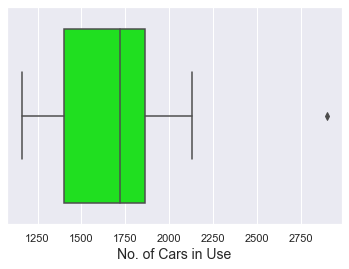

In [151]:
sns.boxplot(x=vehicles_df['Number_Of_Cars_In_Use'], color='lime')
plt.xlabel('No. of Cars in Use', fontsize=14)
plt.show()

In [152]:
vehicles_cleaned_df=vehicles_df[vehicles_df['Number_Of_Cars_In_Use']<2750]

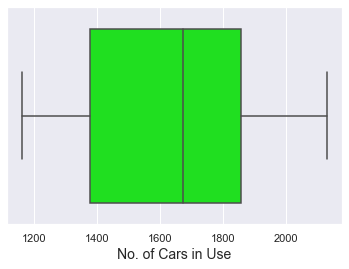

In [153]:
sns.boxplot(x=vehicles_cleaned_df['Number_Of_Cars_In_Use'], color='lime')
plt.xlabel('No. of Cars in Use', fontsize=14)
plt.show()

In [154]:
print(vehicles_cleaned_df.shape)

(32, 8)


# Examining Assumptions


## Check Linearity with Scatterplot

In [155]:
trains_df = vehicles_cleaned_df[['Year', 
    'Number_Of_Locomotives_In_Use', 
    'Million_Miles_Traveled_By_Train', 
    'Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours',
    'Diesel_Energy_Consumption_By_Train_In_Million_Gallons',]]

In [156]:
trains_df.head(10)

,Year,Number_Of_Locomotives_In_Use,Million_Miles_Traveled_By_Train,Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours,Diesel_Energy_Consumption_By_Train_In_Million_Gallons
0,1975,355,30,180,63
1,1980,419,30,254,64
2,1985,291,30,295,65
3,1990,318,33,330,82
4,1991,316,34,303,82
5,1992,336,34,300,82
6,1993,360,35,301,83
7,1994,338,34,309,74
8,1995,313,32,336,72
9,1996,299,30,363,71


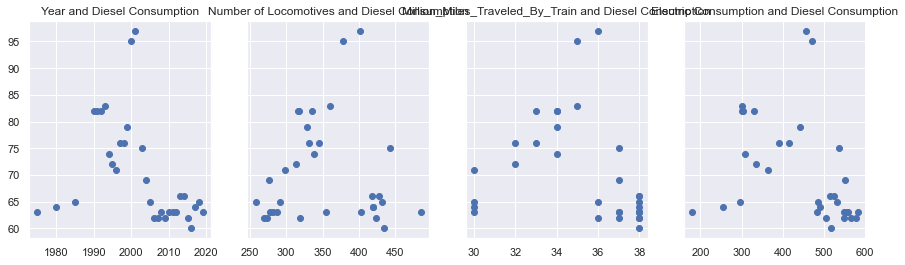

In [157]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 4, sharey=True, figsize=(15,4))
ax1.scatter(trains_df['Year'], trains_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax1.set_title('Year and Diesel Consumption')
ax2.scatter(trains_df['Number_Of_Locomotives_In_Use'], trains_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax2.set_title('Number of Locomotives and Diesel Consumption')
ax3.scatter(trains_df['Million_Miles_Traveled_By_Train'], trains_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax3.set_title('Million_Miles_Traveled_By_Train and Diesel Consumption')
ax4.scatter(trains_df['Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours'], trains_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax4.set_title('Electric Consumption and Diesel Consumption')

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

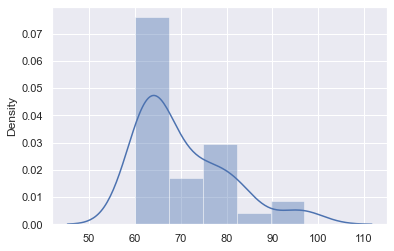

In [158]:
sns.distplot(trains_df[['Diesel_Energy_Consumption_By_Train_In_Million_Gallons']])

## Multicolinearity

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = trains_df[['Year', 
    'Number_Of_Locomotives_In_Use', 
    'Million_Miles_Traveled_By_Train',
    'Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours']]
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [181]:
vif

,VIF,Features
0,382.292028,Year
1,42.990238,Number_Of_Locomotives_In_Use
2,802.055195,Million_Miles_Traveled_By_Train
3,69.867078,Electric_Energy_Consumption_By_Train_In_Millio...


from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = trains_df[['Number_Of_Locomotives_In_Use', 
    'Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours']]
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

In [222]:
data_no_multi = trains_df.drop(['Year'],axis=1)
# data_no_multi = data_no_multi.drop(['Million_Miles_Traveled_By_Train'],axis=1)

In [223]:
data_no_multi.head()

,Number_Of_Locomotives_In_Use,Million_Miles_Traveled_By_Train,Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours,Diesel_Energy_Consumption_By_Train_In_Million_Gallons
0,355,30,180,63
1,419,30,254,64
2,291,30,295,65
3,318,33,330,82
4,316,34,303,82


## Linear Regression Model

### Declare input and target

In [224]:
targets = data_no_multi['Diesel_Energy_Consumption_By_Train_In_Million_Gallons']
inputs = data_no_multi.drop(['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'], axis=1)

### Scale the data

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [226]:
inputs_scaled = scaler.transform(inputs)

In [227]:
inputs_scaled

array([[ 0.05177044, -1.92655935, -2.37770105],
       [ 1.08114767, -1.92655935, -1.71224826],
       [-0.97760679, -1.92655935, -1.34355144],
       [-0.54333827, -0.83218244, -1.02881025],
       [-0.57550631, -0.46739014, -1.2716106 ],
       [-0.25382593, -0.46739014, -1.29858841],
       [ 0.13219053, -0.10259784, -1.28959581],
       [-0.22165789, -0.46739014, -1.21765497],
       [-0.62375837, -1.19697474, -0.97485462],
       [-0.84893464, -1.92655935, -0.73205428],
       [-0.318162  , -1.19697474, -0.48925393],
       [-0.10906976, -0.83218244, -0.2554462 ],
       [-0.36641406, -0.46739014, -0.01264585],
       [ 0.42170288, -0.10259784,  0.23015449],
       [ 0.79163532,  0.26219447,  0.10425802],
       [ 1.45108011,  0.62698677,  0.83265905],
       [-1.21886708,  0.62698677,  0.95855552],
       [-1.50837943,  0.26219447,  0.77870342],
       [-0.52725425,  0.26219447,  0.94057031],
       [-1.3153712 ,  0.62698677,  1.20135587],
       [-1.18669904,  0.99177907,  1.237

## Train Test Split

In [228]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

## Create the Regression

In [229]:
from sklearn.linear_model import LinearRegression

In [230]:
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [231]:
y_hat = reg.predict(x_train)

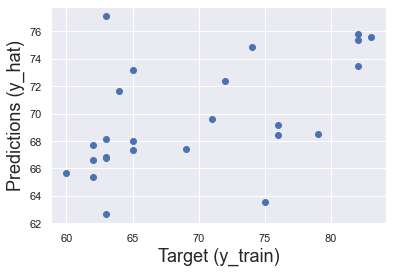

In [232]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

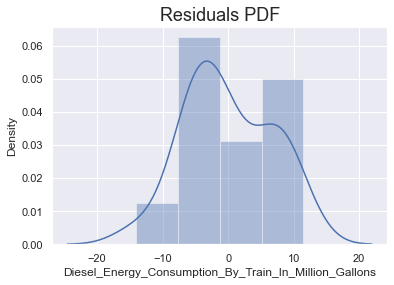

In [233]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [234]:
reg.score(x_train, y_train)

0.272738877115168

In [235]:
from sklearn.metrics import mean_squared_error
reg_mse = mean_squared_error(y_train,y_hat)
reg_mse

42.057801640879

In [236]:
reg_mrse = np.sqrt(reg_mse)
reg_mrse

6.485198658551564

In [237]:
from sklearn.metrics import mean_absolute_error
reg_mae = mean_absolute_error(y_train, y_hat)
reg_mae

5.479837423089877